### CAR BRAND CLASSIFICATION USING DEEP LEARNING

In [1]:
#importing libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\SANTANU SANTRA\Downloads\carDL\Datasets\train'
valid_path = r'C:\Users\SANTANU SANTRA\Downloads\carDL\Datasets\test'

In [3]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob(r'C:\Users\SANTANU SANTRA\Downloads\carDL\Datasets\train\*')

In [7]:
folders

['C:\\Users\\SANTANU SANTRA\\Downloads\\carDL\\Datasets\\train\\audi',
 'C:\\Users\\SANTANU SANTRA\\Downloads\\carDL\\Datasets\\train\\lamborghini',
 'C:\\Users\\SANTANU SANTRA\\Downloads\\carDL\\Datasets\\train\\mercedes']

In [6]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\\Users\\SANTANU SANTRA\\Downloads\\carDL\\Datasets\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory(r'C:\\Users\\SANTANU SANTRA\\Downloads\\carDL\\Datasets\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 4.7073 - accuracy: 0.4062 - val_loss: 11.7946 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 8s 4s/step - loss: 12.8773 - accuracy: 0.2969 - val_loss: 6.5576 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 10s 5s/step - loss: 4.1733 - accuracy: 0.3438 - val_loss: 7.6784 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 10s 5s/step - loss: 7.7346 - accuracy: 0.3906 - val_loss: 8.8316 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 9s 4s/step - loss: 6.6575 - accuracy: 0.3906 - val_loss: 1.4051 - val_accuracy: 0.5690
Epoch 6/50
2/2 [==============================] - 9s 4s/step - loss: 2.2162 - accuracy: 0.4688 - val_loss: 4.2318 - val_accuracy: 0.2414
Epoch 7/50
2/2 [==============================] - 9s 5s/step - loss: 4.4131 - accuracy: 0.4062 - 

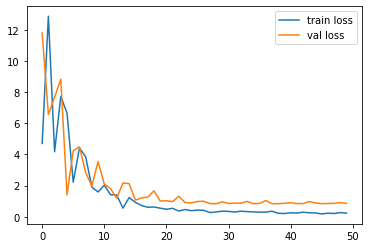

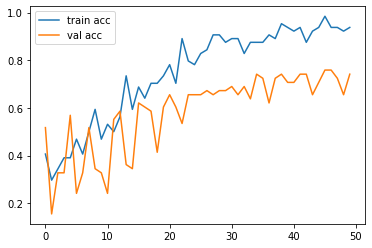

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[3.46617512e-02, 4.98347282e-01, 4.66991007e-01],
       [5.01056090e-02, 2.21958607e-02, 9.27698493e-01],
       [5.99172235e-01, 1.87596828e-02, 3.82068098e-01],
       [1.87868997e-02, 9.43656623e-01, 3.75564918e-02],
       [1.21231899e-01, 6.29497886e-01, 2.49270231e-01],
       [8.02937225e-02, 3.89023423e-01, 5.30682802e-01],
       [9.25066974e-03, 9.62665439e-01, 2.80838944e-02],
       [2.82175895e-02, 5.31397343e-01, 4.40385103e-01],
       [4.98735495e-02, 2.41290852e-02, 9.25997317e-01],
       [1.16103031e-02, 9.83379900e-01, 5.00981370e-03],
       [5.92493296e-01, 2.82133669e-01, 1.25373125e-01],
       [3.36309918e-03, 9.53123987e-01, 4.35129851e-02],
       [3.93373340e-01, 3.45008433e-01, 2.61618167e-01],
       [1.17019594e-01, 3.07485878e-01, 5.75494528e-01],
       [7.32227325e-01, 1.51734412e-01, 1.16038248e-01],
       [2.50939038e-02, 3.66210699e-01, 6.08695388e-01],
       [1.42142355e-01, 5.35808444e-01, 3.22049230e-01],
       [3.64393555e-03, 4.48268

In [18]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:

model=load_model('model_resnet50.h5')

In [23]:

img=image.load_img(r'C:\\Users\\SANTANU SANTRA\\Downloads\\carDL\\Datasets\\Test\\lamborghini\\11.jpg',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:

x=x/255

In [26]:

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

array([[3.9703125e-04, 7.6414476e-04, 9.9883884e-01]], dtype=float32)

In [28]:
a=np.argmax(model.predict(img_data), axis=1)

In [29]:
a

array([2], dtype=int64)

In [34]:
a==1

array([False])